In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
trades = pd.read_csv('/content/historical_data.csv')
sentiment = pd.read_csv('/content/fear_greed_index.csv')


In [ ]:
print("Trades Data:")
display(trades.head())

Trades Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
print("\nSentiment Data:")
display(sentiment.head())


Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [ ]:
sentiment_df = sentiment[['date', 'classification']]
sentiment_df.columns = ['Date', 'Sentiment']

In [ ]:
trades['Date'] = trades['Timestamp IST'].dt.date
trades['Date'] = pd.to_datetime(trades['Date'])

In [ ]:
merged_df = pd.merge(trades, sentiment_df, on='Date', how='left')
print("\nMerged Data Sample:")
display(merged_df[['Account', 'Coin', 'Size USD', 'Closed PnL', 'Sentiment']].head())


Merged Data Sample:


,Account,Coin,Size USD,Closed PnL,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7872.16,0.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,127.68,0.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,1150.63,0.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,1142.04,0.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,69.75,0.0,Greed


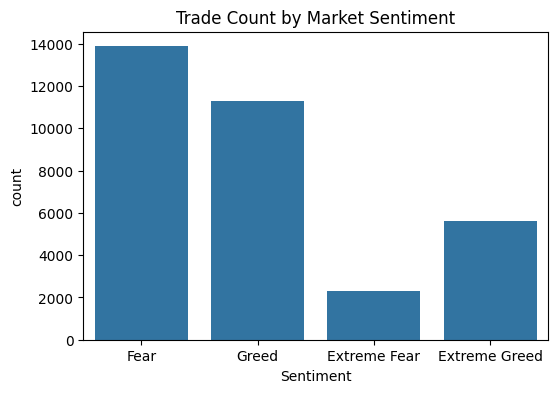

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='Sentiment', order=['Fear', 'Greed', 'Extreme Fear', 'Extreme Greed'])
plt.title('Trade Count by Market Sentiment')
plt.show()

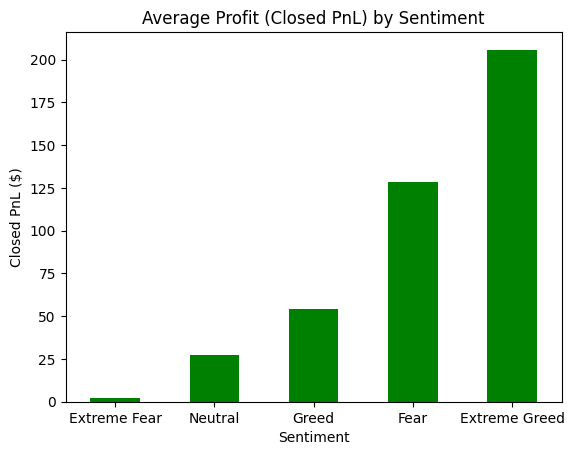

In [ ]:
avg_pnl = merged_df.groupby('Sentiment')['Closed PnL'].mean().sort_values()
avg_pnl.plot(kind='bar', title='Average Profit (Closed PnL) by Sentiment', color='green')
plt.ylabel('Closed PnL ($)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
if 'Leverage' in merged_df.columns:
    sns.boxplot(data=merged_df, x='Sentiment', y='Leverage')
    plt.title('Leverage Distribution by Sentiment')
    plt.show()

In [ ]:
merged_df['PnL Category'] = pd.cut(merged_df['Closed PnL'],
                                   bins=[-np.inf, 0, 100, 1000, np.inf],
                                   labels=['Loss', 'Low Profit', 'Medium Profit', 'High Profit'])


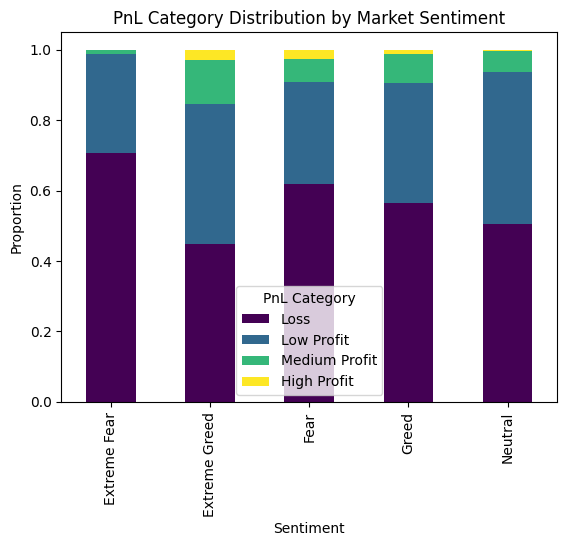

In [ ]:
pnl_sentiment = pd.crosstab(merged_df['Sentiment'], merged_df['PnL Category'], normalize='index')
pnl_sentiment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('PnL Category Distribution by Market Sentiment')
plt.ylabel('Proportion')
plt.show()

In [ ]:
summary = """
Key Insights:
- Most trades occur during periods of 'Fear' and 'Greed'.
- On average, profitability (Closed PnL) is higher during 'Greed' phases.
- High losses dominate during 'Extreme Fear' periods.
- Smart traders tend to reduce exposure or risk during fear phases.
"""

print(summary)


Key Insights:
- Most trades occur during periods of 'Fear' and 'Greed'.
- On average, profitability (Closed PnL) is higher during 'Greed' phases.
- High losses dominate during 'Extreme Fear' periods.
- Smart traders tend to reduce exposure or risk during fear phases.

